In [6]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.wireframe import Wireframe
import keras 

from samples.wireframe.database_actions import reinitialize_table, add_encoding
from samples.wireframe.knn import overlaps_bool

%matplotlib inline 

In [7]:
config = Wireframe.WireframeConfig()
WIREFRAME_DIR = os.path.join(ROOT_DIR, "datasets/wireframe")

In [8]:
NUM_TRAINING_IMAGES = 100
MAX_ICONS_PER_IMAGE = 3

# Training dataset
dataset_train = Wireframe.WireframeDataset()
dataset_train.generate_data(NUM_TRAINING_IMAGES, MAX_ICONS_PER_IMAGE)

dataset_train.load_wireframe(WIREFRAME_DIR, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = Wireframe.WireframeDataset()
dataset_val.load_wireframe(WIREFRAME_DIR, "val")
dataset_val.prepare()

In [9]:
MODEL_NAME = "Mask_Res50.h5"

class InferenceConfig(Wireframe.WireframeConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, MODEL_NAME)
# model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /Users/alexanderholstrup/git/Mask_RCNN/Mask_Res50.h5


In [10]:
reinitialize_table("Database.db")
for image_id in dataset_train.image_ids:
    print("Image no: {}".format(image_id))
    original_image, _, real_labels, real_bboxes, gt_mask = \
        modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)
    results = model.detect([original_image])
    detected_rois = results[0]['rois']
    embeddings = results[1]
    
    # For each roi: 
    for i, roi in enumerate(detected_rois):
        for j, bbox in enumerate(real_bboxes):
            if overlaps_bool(roi, bbox):
                embedding = embeddings[:, i, :]
                label = real_labels[j]
                add_encoding("Database.db", embedding, int(label))


Image no: 0
Image no: 1
Image no: 2
Image no: 3
Image no: 4
Image no: 5
Image no: 6
Image no: 7
Image no: 8
Image no: 9
Image no: 10
Image no: 11
Image no: 12
Image no: 13
Image no: 14
Image no: 15
Image no: 16
Image no: 17
Image no: 18
Image no: 19
Image no: 20
Image no: 21
Image no: 22
Image no: 23
Image no: 24
Image no: 25
Image no: 26
Image no: 27
Image no: 28
Image no: 29
Image no: 30
Image no: 31
Image no: 32
Image no: 33
Image no: 34
Image no: 35
Image no: 36
Image no: 37
Image no: 38
Image no: 39
Image no: 40
Image no: 41
Image no: 42
Image no: 43
Image no: 44
Image no: 45
Image no: 46
Image no: 47
Image no: 48
Image no: 49
Image no: 50
Image no: 51
Image no: 52
Image no: 53
Image no: 54
Image no: 55
Image no: 56
Image no: 57
Image no: 58
Image no: 59
Image no: 60
Image no: 61
Image no: 62
Image no: 63
Image no: 64
Image no: 65
Image no: 66
Image no: 67
Image no: 68
Image no: 69
Image no: 70
Image no: 71
Image no: 72
Image no: 73
Image no: 74
Image no: 75
Image no: 76
Image no:

Train on 153 samples, validate on 52 samples
Epoch 1/1000
 - 1s - loss: 0.2939 - acc: 0.0000e+00 - val_loss: 0.2883 - val_acc: 0.0000e+00
Epoch 2/1000
 - 0s - loss: 0.2939 - acc: 0.0000e+00 - val_loss: 0.2882 - val_acc: 0.0000e+00
Epoch 3/1000
 - 0s - loss: 0.2938 - acc: 0.0000e+00 - val_loss: 0.2882 - val_acc: 0.0000e+00
Epoch 4/1000
 - 0s - loss: 0.2938 - acc: 0.0000e+00 - val_loss: 0.2882 - val_acc: 0.0000e+00
Epoch 5/1000
 - 0s - loss: 0.2996 - acc: 0.0000e+00 - val_loss: 0.2881 - val_acc: 0.0000e+00
Epoch 6/1000
 - 0s - loss: 0.2995 - acc: 0.0000e+00 - val_loss: 0.2880 - val_acc: 0.0000e+00
Epoch 7/1000
 - 0s - loss: 0.2935 - acc: 0.0000e+00 - val_loss: 0.2880 - val_acc: 0.0000e+00
Epoch 8/1000
 - 0s - loss: 0.2935 - acc: 0.0000e+00 - val_loss: 0.2879 - val_acc: 0.0000e+00
Epoch 9/1000
 - 0s - loss: 0.2993 - acc: 0.0000e+00 - val_loss: 0.2879 - val_acc: 0.0000e+00
Epoch 10/1000
 - 0s - loss: 0.2933 - acc: 0.0000e+00 - val_loss: 0.2878 - val_acc: 0.0000e+00
Epoch 11/1000
 - 0s - lo

Epoch 88/1000
 - 0s - loss: 0.2847 - acc: 0.0000e+00 - val_loss: 0.2823 - val_acc: 0.0000e+00
Epoch 89/1000
 - 0s - loss: 0.2854 - acc: 0.0000e+00 - val_loss: 0.2822 - val_acc: 0.0000e+00
Epoch 90/1000
 - 0s - loss: 0.2846 - acc: 0.0000e+00 - val_loss: 0.2821 - val_acc: 0.0000e+00
Epoch 91/1000
 - 0s - loss: 0.2843 - acc: 0.0000e+00 - val_loss: 0.2820 - val_acc: 0.0000e+00
Epoch 92/1000
 - 0s - loss: 0.2843 - acc: 0.0000e+00 - val_loss: 0.2819 - val_acc: 0.0000e+00
Epoch 93/1000
 - 0s - loss: 0.2845 - acc: 0.0000e+00 - val_loss: 0.2818 - val_acc: 0.0000e+00
Epoch 94/1000
 - 0s - loss: 0.2841 - acc: 0.0000e+00 - val_loss: 0.2817 - val_acc: 0.0000e+00
Epoch 95/1000
 - 0s - loss: 0.2840 - acc: 0.0000e+00 - val_loss: 0.2816 - val_acc: 0.0000e+00
Epoch 96/1000
 - 0s - loss: 0.2835 - acc: 0.0000e+00 - val_loss: 0.2815 - val_acc: 0.0000e+00
Epoch 97/1000
 - 0s - loss: 0.2839 - acc: 0.0000e+00 - val_loss: 0.2814 - val_acc: 0.0000e+00
Epoch 98/1000
 - 0s - loss: 0.2837 - acc: 0.0000e+00 - val_l

Epoch 175/1000
 - 0s - loss: 0.2628 - acc: 0.0000e+00 - val_loss: 0.2678 - val_acc: 0.0000e+00
Epoch 176/1000
 - 0s - loss: 0.2628 - acc: 0.0000e+00 - val_loss: 0.2676 - val_acc: 0.0000e+00
Epoch 177/1000
 - 0s - loss: 0.2624 - acc: 0.0000e+00 - val_loss: 0.2674 - val_acc: 0.0000e+00
Epoch 178/1000
 - 0s - loss: 0.2621 - acc: 0.0000e+00 - val_loss: 0.2671 - val_acc: 0.0000e+00
Epoch 179/1000
 - 0s - loss: 0.2616 - acc: 0.0000e+00 - val_loss: 0.2669 - val_acc: 0.0000e+00
Epoch 180/1000
 - 0s - loss: 0.2613 - acc: 0.0000e+00 - val_loss: 0.2667 - val_acc: 0.0000e+00
Epoch 181/1000
 - 0s - loss: 0.2612 - acc: 0.0000e+00 - val_loss: 0.2665 - val_acc: 0.0000e+00
Epoch 182/1000
 - 0s - loss: 0.2614 - acc: 0.0000e+00 - val_loss: 0.2663 - val_acc: 0.0000e+00
Epoch 183/1000
 - 0s - loss: 0.2603 - acc: 0.0000e+00 - val_loss: 0.2661 - val_acc: 0.0000e+00
Epoch 184/1000
 - 0s - loss: 0.2666 - acc: 0.0000e+00 - val_loss: 0.2659 - val_acc: 0.0000e+00
Epoch 185/1000
 - 0s - loss: 0.2603 - acc: 0.0000e

Epoch 262/1000
 - 0s - loss: 0.2271 - acc: 0.0000e+00 - val_loss: 0.2428 - val_acc: 0.0000e+00
Epoch 263/1000
 - 0s - loss: 0.2263 - acc: 0.0000e+00 - val_loss: 0.2424 - val_acc: 0.0000e+00
Epoch 264/1000
 - 0s - loss: 0.2256 - acc: 0.0000e+00 - val_loss: 0.2421 - val_acc: 0.0000e+00
Epoch 265/1000
 - 0s - loss: 0.2251 - acc: 0.0000e+00 - val_loss: 0.2418 - val_acc: 0.0000e+00
Epoch 266/1000
 - 0s - loss: 0.2311 - acc: 0.0000e+00 - val_loss: 0.2414 - val_acc: 0.0000e+00
Epoch 267/1000
 - 0s - loss: 0.2226 - acc: 0.0000e+00 - val_loss: 0.2411 - val_acc: 0.0000e+00
Epoch 268/1000
 - 0s - loss: 0.2197 - acc: 0.0000e+00 - val_loss: 0.2408 - val_acc: 0.0000e+00
Epoch 269/1000
 - 0s - loss: 0.2204 - acc: 0.0000e+00 - val_loss: 0.2405 - val_acc: 0.0000e+00
Epoch 270/1000
 - 0s - loss: 0.2200 - acc: 0.0000e+00 - val_loss: 0.2402 - val_acc: 0.0000e+00
Epoch 271/1000
 - 0s - loss: 0.2221 - acc: 0.0000e+00 - val_loss: 0.2398 - val_acc: 0.0000e+00
Epoch 272/1000
 - 0s - loss: 0.2226 - acc: 0.0000e

Epoch 349/1000
 - 0s - loss: 0.1819 - acc: 0.0000e+00 - val_loss: 0.2031 - val_acc: 0.0000e+00
Epoch 350/1000
 - 0s - loss: 0.1781 - acc: 0.0000e+00 - val_loss: 0.2024 - val_acc: 0.0000e+00
Epoch 351/1000
 - 0s - loss: 0.1848 - acc: 0.0000e+00 - val_loss: 0.2019 - val_acc: 0.0000e+00
Epoch 352/1000
 - 0s - loss: 0.1765 - acc: 0.0000e+00 - val_loss: 0.2012 - val_acc: 0.0000e+00
Epoch 353/1000
 - 0s - loss: 0.1771 - acc: 0.0000e+00 - val_loss: 0.2006 - val_acc: 0.0000e+00
Epoch 354/1000
 - 0s - loss: 0.1738 - acc: 0.0000e+00 - val_loss: 0.2000 - val_acc: 0.0000e+00
Epoch 355/1000
 - 0s - loss: 0.1751 - acc: 0.0000e+00 - val_loss: 0.1994 - val_acc: 0.0000e+00
Epoch 356/1000
 - 0s - loss: 0.1710 - acc: 0.0000e+00 - val_loss: 0.1987 - val_acc: 0.0000e+00
Epoch 357/1000
 - 0s - loss: 0.1717 - acc: 0.0000e+00 - val_loss: 0.1981 - val_acc: 0.0000e+00
Epoch 358/1000
 - 0s - loss: 0.1726 - acc: 0.0000e+00 - val_loss: 0.1975 - val_acc: 0.0000e+00
Epoch 359/1000
 - 0s - loss: 0.1715 - acc: 0.0000e

Epoch 436/1000
 - 0s - loss: 0.1546 - acc: 0.0000e+00 - val_loss: 0.1668 - val_acc: 0.0000e+00
Epoch 437/1000
 - 0s - loss: 0.1437 - acc: 0.0000e+00 - val_loss: 0.1666 - val_acc: 0.0000e+00
Epoch 438/1000
 - 0s - loss: 0.1463 - acc: 0.0000e+00 - val_loss: 0.1664 - val_acc: 0.0000e+00
Epoch 439/1000
 - 0s - loss: 0.1509 - acc: 0.0000e+00 - val_loss: 0.1662 - val_acc: 0.0000e+00
Epoch 440/1000
 - 0s - loss: 0.1513 - acc: 0.0000e+00 - val_loss: 0.1660 - val_acc: 0.0000e+00
Epoch 441/1000
 - 0s - loss: 0.1456 - acc: 0.0000e+00 - val_loss: 0.1656 - val_acc: 0.0000e+00
Epoch 442/1000
 - 0s - loss: 0.1504 - acc: 0.0000e+00 - val_loss: 0.1655 - val_acc: 0.0000e+00
Epoch 443/1000
 - 0s - loss: 0.1478 - acc: 0.0000e+00 - val_loss: 0.1654 - val_acc: 0.0000e+00
Epoch 444/1000
 - 0s - loss: 0.1519 - acc: 0.0000e+00 - val_loss: 0.1654 - val_acc: 0.0000e+00
Epoch 445/1000
 - 0s - loss: 0.1472 - acc: 0.0000e+00 - val_loss: 0.1651 - val_acc: 0.0000e+00
Epoch 446/1000
 - 0s - loss: 0.1472 - acc: 0.0000e

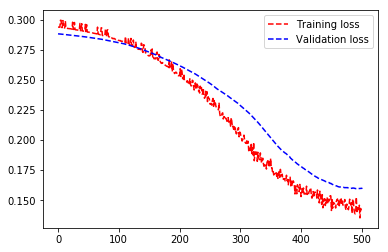

In [13]:
from model_triplet import Model 
from samples.wireframe.database_actions import get_known_encodings


#Save the losses
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.trainlosses = []
        self.vallosses = []

    def on_epoch_end(self, epoch, logs={}):
        self.trainlosses.append(logs.get('loss'))
        self.vallosses.append(logs.get('val_loss'))

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=8,
                                           verbose=0, mode='auto', baseline=None, restore_best_weights=True)

embeddings, labels = get_known_encodings('Database.db', 1024)

#Train the model
history = LossHistory()
triplet_model = Model()
triplet_model.model.fit(embeddings.T, labels, batch_size=50, epochs=1000, callbacks=[history, stop_early], validation_split=0.25
                , verbose=2)



#Plot the training loss
line1 = plt.plot(history.trainlosses, 'r--', label = "Training loss")
plt.plot(history.vallosses, 'b--', label = "Validation loss")
plt.legend()
plt.show()


#Save the weights
triplet_model.model.save_weights("Triplet_Res50_03.h5")




In [16]:
reinitialize_table("Database.db")
for image_id in dataset_train.image_ids:
    print("Image no: {}".format(image_id))
    original_image, _, real_labels, real_bboxes, gt_mask = \
        modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)
    results = model.detect([original_image])
    detected_rois = results[0]['rois']
    embeddings = results[1]
    
    # For each roi: 
    for i, roi in enumerate(detected_rois):
        for j, bbox in enumerate(real_bboxes):
            if overlaps_bool(roi, bbox):
                embedding = embeddings[:, i, :]
                embedding = triplet_model.model.predict(embedding)
                label = real_labels[j]
                add_encoding("Database.db", embedding, int(label))

Image no: 0
Image no: 1
Image no: 2
Image no: 3
Image no: 4
Image no: 5
Image no: 6
Image no: 7
Image no: 8
Image no: 9
Image no: 10
Image no: 11
Image no: 12
Image no: 13
Image no: 14
Image no: 15
Image no: 16
Image no: 17
Image no: 18
Image no: 19
Image no: 20
Image no: 21
Image no: 22
Image no: 23
Image no: 24
Image no: 25
Image no: 26
Image no: 27
Image no: 28
Image no: 29
Image no: 30
Image no: 31
Image no: 32
Image no: 33
Image no: 34
Image no: 35
Image no: 36
Image no: 37
Image no: 38
Image no: 39
Image no: 40
Image no: 41
Image no: 42
Image no: 43
Image no: 44
Image no: 45
Image no: 46
Image no: 47
Image no: 48
Image no: 49
Image no: 50
Image no: 51
Image no: 52
Image no: 53
Image no: 54
Image no: 55
Image no: 56
Image no: 57
Image no: 58
Image no: 59
Image no: 60
Image no: 61
Image no: 62
Image no: 63
Image no: 64
Image no: 65
Image no: 66
Image no: 67
Image no: 68
Image no: 69
Image no: 70
Image no: 71
Image no: 72
Image no: 73
Image no: 74
Image no: 75
Image no: 76
Image no:

In [40]:
import metrics
# Load the data and define the necessary variables
embeddings, labels = get_known_encodings("Database.db", 128)
import sklearn

In [50]:

#metrics.metricFunction(embeddings,labels,10)
#sklearn.cluster.DBSCAN(embeddings.T)

clustering = sklearn.cluster.DBSCAN(eps=0.05, min_samples=2).fit(embeddings.T)
np.where(clustering.labels_ == 0)

(array([  0,  10,  22,  31,  40,  46,  61,  75,  76,  77,  78,  84,  85,
         88,  90, 100, 102, 103, 129, 139, 156, 158, 160, 163, 176, 177,
        203]),)

In [70]:
sklearn.metrics.silhouette_score(embeddings.T, labels, metric='euclidean', sample_size=None, random_state=None)

0.30716097